In [4]:
import pypulse as pulsar
import matplotlib.pyplot as plt
import numpy as np
import glob
import subprocess
from IPython.display import Image

In [5]:
# Load all PFD files in folder
timing_folder = './A1/'
pfd_files = glob.glob(timing_folder+'*pfd')

In [6]:
# Convert PFD files to PSRFITS
for pfd in pfd_files:
    subprocess.check_call(['psrconv','-o','PSRFITS','-e','fits',pfd])

# Save all PSRFITS files
psrfits_files = glob.glob(timing_folder+'*fits')

# Load all PSRFITS into PyPulse
fits_pypulse= []
for psrfits in psrfits_files:
    temp_pypulse= pulsar.Archive(psrfits)
    fits_pypulse.append(temp_pypulse)

observations = dict(zip(psrfits_files, fits_pypulse))

Loading: ./A1/prepfold_20190520_115652_PSR_0437-4715.fits
Load time: 9.62 s
Loading: ./A1/ds4096_J0437-4715_A1_20190927_040901_0.00-0.85_PSR_0437-4715.fits
Load time: 1.75 s
Loading: ./A1/prepfold_20190621_094647_PSR_0437-4715.fits
Load time: 1.16 s
Loading: ./A1/prepfold_20190903_045245_PSR_0437-4715.fits
Load time: 0.81 s
Loading: ./A1/prepfold_20190728_073037_PSR_0437-4715.fits
Load time: 0.82 s
Loading: ./A1/prepfold_20190929_030911_PSR_0437-4715.fits
Load time: 0.79 s
Loading: ./A1/ds4096_J0437-4715_A1_20190922_041010_0.00-0.90_PSR_0437-4715.fits
Load time: 1.71 s
Loading: ./A1/ds4096_J0437-4715_A1_20190912_042357_0.00-0.86_PSR_0437-4715.fits
Load time: 1.66 s
Loading: ./A1/prepfold_20190608_112623_PSR_0437-4715.fits
Load time: 1.70 s
Loading: ./A1/prepfold_20190623_103438_PSR_0437-4715.fits
Load time: 0.81 s
Loading: ./A1/prepfold_20190703_094122_PSR_0437-4715.fits
Load time: 0.82 s
Loading: ./A1/prepfold_20190930_030516_PSR_0437-4715.fits
Load time: 0.89 s
Loading: ./A1/prepfold

In [8]:
# Create single pulse object
# Creat array of best profiles

single_pulses=[]

for observation in fits_pypulse:
    
    # First crunch in time and frequency
    observation.fscrunch()
    observation.tscrunch()
    
    # Now get array of the best profile
    tmp_singlepulse = observation.getSinglePulses(windowsize=256)
    
    # Align and normalize
    tmp_singlepulse.center_align()
    tmp_singlepulse.normalize()
    
    # Save aligned and normalize in each observation
    single_pulses.append(tmp_singlepulse)
    
# Save single pulse object
sp_observations = dict(zip(psrfits_files, single_pulses))

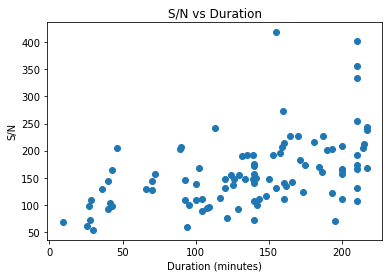

In [9]:
# Plot SN vs duration

duration=[]

allsn = []

for key in observations:
    time = (observations[key].getDuration())/60
    sn = sp_observations[key].getSN()
    bins = observations[key].getNbin()
    duration.append(time)
    allsn.append(sn)
    
plt.close()
plt.scatter(duration, allsn)
plt.title('S/N vs Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('S/N')
plt.show()

In [11]:
# Let us make a template with the best observation

# Take the best SN observation (super inefficient but still fast)

sn_max = np.max(allsn)
for key in observations:
    if sp_observations[key].getSN() == sn_max:
        template_obs = key
        
print(template_obs)
print(sn_max)

./A1/ds4096_J0437-4715_A1_20190912_042357_0.00-0.86_PSR_0437-4715.fits
418.457504361


/opt/conda/lib/python3.6/site-packages/PyPulse-0.1-py3.6.egg/pypulse/utils.py:549: RuntimeWarning: overflow encountered in exp
  y = np.exp(numer - denom)
/opt/conda/lib/python3.6/site-packages/PyPulse-0.1-py3.6.egg/pypulse/utils.py:552: RuntimeWarning: invalid value encountered in true_divide
  y /= np.max(np.abs(y))


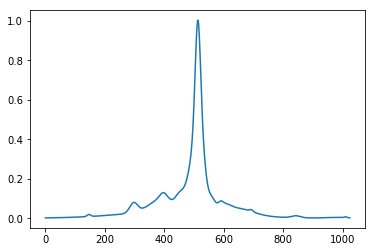

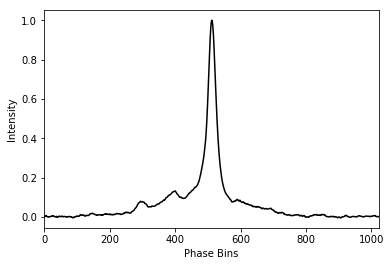

In [12]:
# Make the template
template_sp = observations[template_obs].getSinglePulses(windowsize=32)
template_sp.center_align()
template_sp.normalize()
template = template_sp.vonMises_smoothing(nmax=30)

# Check template
plt.close()
plt.plot(template)
template_sp.plot()
plt.show()